In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
df = pd.read_csv('diabetes.csv')

In [3]:
from sklearn.impute import SimpleImputer

zero_cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[zero_cols] = df[zero_cols].replace(0, np.nan)

imputer = SimpleImputer(strategy='median')
df[zero_cols] = imputer.fit_transform(df[zero_cols])

df = df.drop_duplicates()

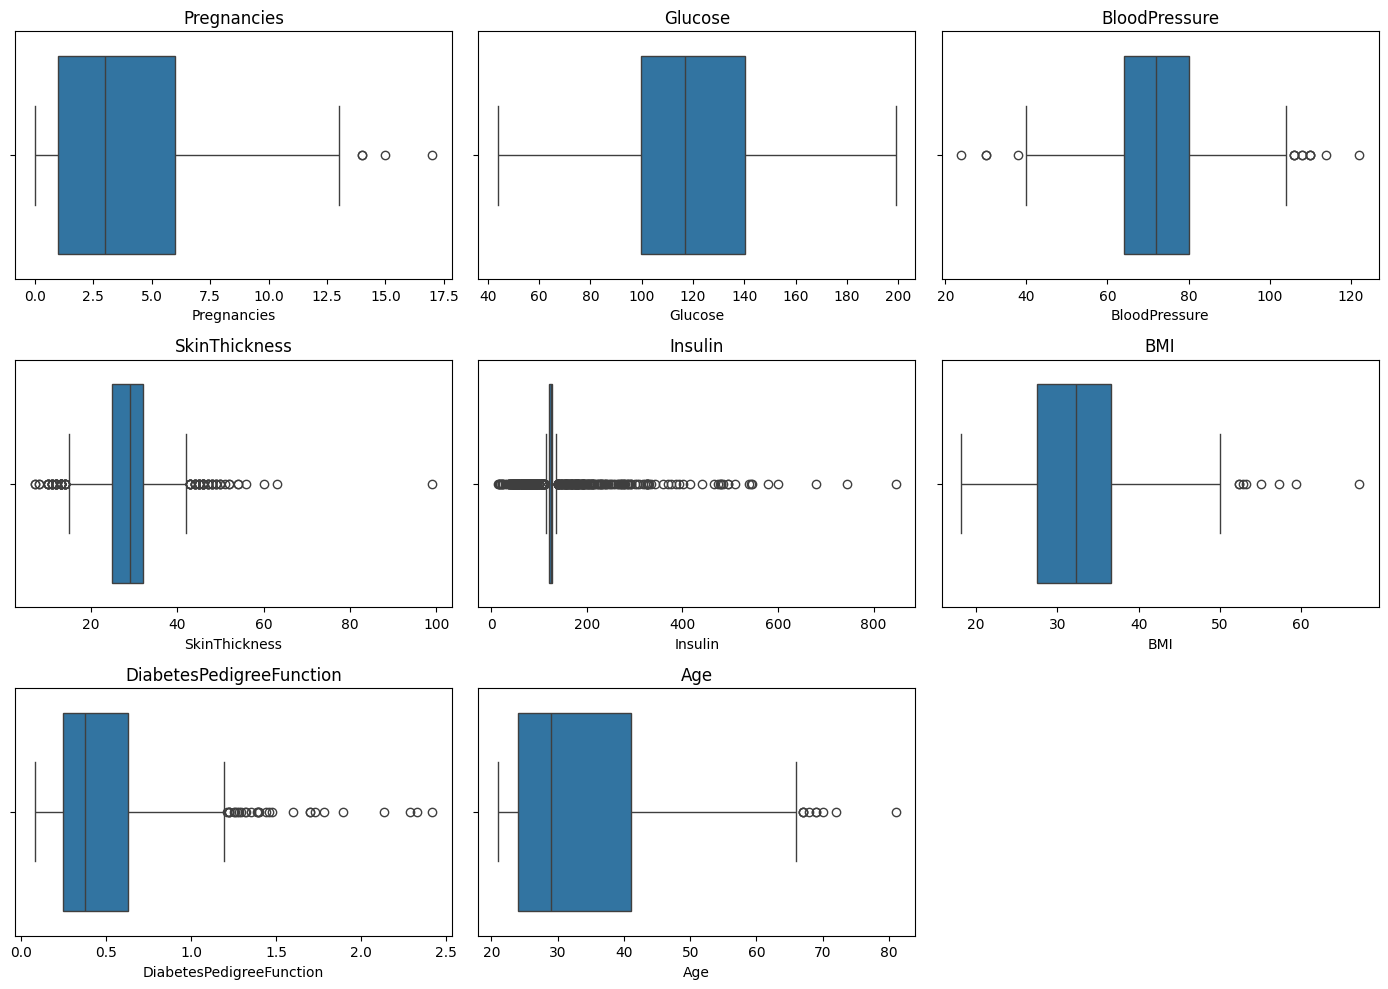

In [4]:
num = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
       'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

plt.figure(figsize=(14, 10))
for i in range(len(num)):
    plt.subplot(3, 3, i+1)
    sns.boxplot(data=df, x=num[i])
    plt.title(num[i])
    
plt.tight_layout()
plt.show()

In [5]:
features = [
    'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
    'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'
]
X = df[features]
y = df['Outcome']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
model = RandomForestClassifier(random_state=42, class_weight='balanced')
model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [8]:
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)

In [9]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {round(accuracy * 100)}%")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 76%
Confusion Matrix:
 [[80 19]
 [18 37]]


In [45]:
print("\nSample probability predictions:")
for i in range(min(20, len(y_proba))):
    print(f"Patient {i + 1}:")
    print(f"  Probability of No Diabetes (0): {y_proba[i][0]:.2f}")
    print(f"  Probability of Diabetes (1): {y_proba[i][1]:.2f}")
    print(f"  Actual Outcome: {y_test.iloc[i]}")
    print(f"  Predicted Outcome: {y_pred[i]}")
    print("-" * 30)


Sample probability predictions:
Patient 1:
  Probability of No Diabetes (0): 0.60
  Probability of Diabetes (1): 0.40
  Actual Outcome: 0
  Predicted Outcome: 0
------------------------------
Patient 2:
  Probability of No Diabetes (0): 0.81
  Probability of Diabetes (1): 0.19
  Actual Outcome: 0
  Predicted Outcome: 0
------------------------------
Patient 3:
  Probability of No Diabetes (0): 0.91
  Probability of Diabetes (1): 0.09
  Actual Outcome: 0
  Predicted Outcome: 0
------------------------------
Patient 4:
  Probability of No Diabetes (0): 0.77
  Probability of Diabetes (1): 0.23
  Actual Outcome: 0
  Predicted Outcome: 0
------------------------------
Patient 5:
  Probability of No Diabetes (0): 0.51
  Probability of Diabetes (1): 0.49
  Actual Outcome: 0
  Predicted Outcome: 0
------------------------------
Patient 6:
  Probability of No Diabetes (0): 0.34
  Probability of Diabetes (1): 0.66
  Actual Outcome: 0
  Predicted Outcome: 1
------------------------------
Patient

In [10]:
import joblib
joblib.dump(model, 'random_forest_model.pkl')

['random_forest_model.pkl']